In [23]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns 
import matplotlib.pyplot as plt
import math

data_dir = "../../data/5001data"
print(os.listdir(data_dir))

['group_match_data_train.zip', 'group_match_data_train.csv', 'train_V2.csv.zip', 'test_V2.csv.zip']


# Data Analysis

In [24]:
df_train = pd.read_csv("../../data/5001data/train_V2.csv.zip")

In [3]:
# df_test = pd.read_csv("../data/5001data/test_V2.csv.zip")

In [25]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [26]:
df_train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a238f2518>,
      dtype=object)

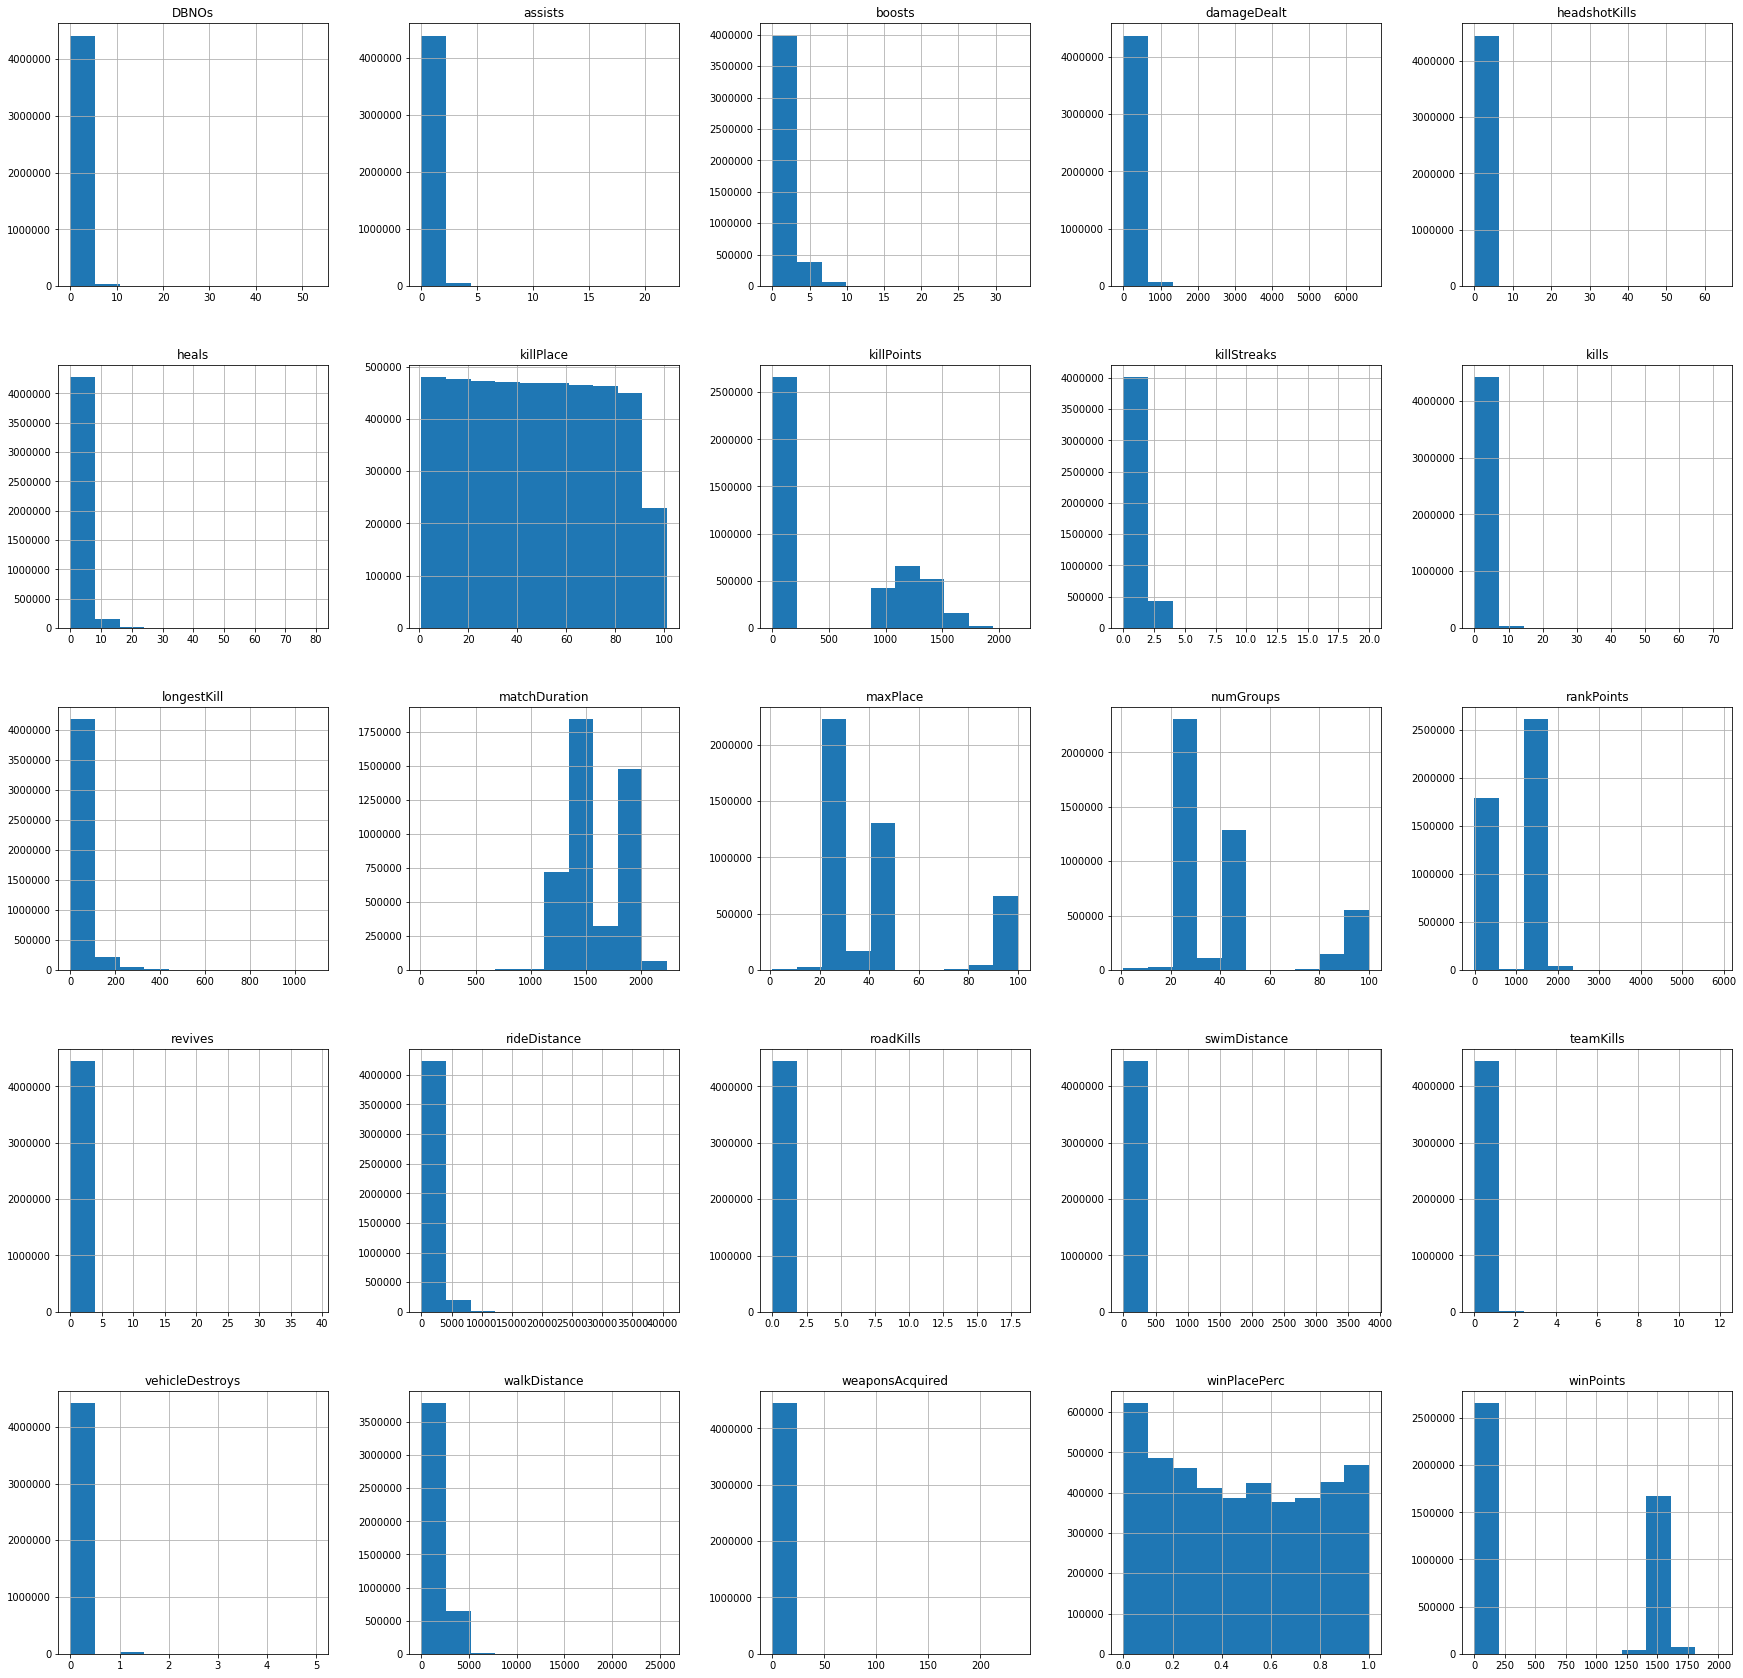

In [4]:
df_train.hist(bins=10, figsize=(30, 30))

In [16]:
# agg_cols = ['groupId', 'killPlace', 'killStreaks', 'walkDistance', 'winPlacePerc']
# agg_func = {'groupId':'count', 
#             'killPlace':['min','max'], 
#             'killStreaks':'sum', 
#             'walkDistance':'sum' , 
#             'winPlacePerc': 'max'}

# match_0 = df_train.query('matchId == 2').reset_index()
# # print(match_0.keys())
# # print(match_0['numGroups'][0])
# #print(match_0.query('groupId == 878228'))# 21')
# grp = match_0[agg_cols]\
# .groupby(['groupId'])\
# .agg(agg_func)\
# .sort_values(by=[('winPlacePerc', 'max')], ascending=False)

## 1. Group by data by group & match 

In [5]:
agg_funcs = {'assists':'sum',
             'boosts':'sum',
             'damageDealt':'sum',
             'DBNOs':'sum',
             'headshotKills':'sum',
             'heals':'sum',
             'killPlace':'min',
             'killPoints':'sum',
             'kills':'sum',
             'killStreaks':'sum',
             'longestKill':'max',
             'matchDuration':'mean',
             'matchType':'max', # new value
             'maxPlace':'max', # may not equal to group num
             'numGroups':'max',
             'rankPoints':'sum', # depatured in next version
             'revives':'sum',
             'rideDistance':'sum',
             'roadKills':'sum',
             'swimDistance':'sum',
             'teamKills':'sum',
             'vehicleDestroys':'sum',
             'walkDistance':'sum',
             'weaponsAcquired':'sum',
             'winPoints':'sum', # rankPoints where only win counts
             'winPlacePerc':'max'} # 1 is best, 0 is last

In [6]:
group_match_data = df_train.groupby(['groupId', 'matchId'])
group_match_data = group_match_data.agg(agg_funcs)
group_match_data = group_match_data.sort_values(by=['matchId','winPlacePerc'],
                                                ascending=False)
group_match_data = group_match_data.reset_index()
group_match_data = group_match_data.sort_values(by=['matchId', 'winPlacePerc'],
                                                ascending=False)
group_match_data = group_match_data.reindex()

**rename groupId & matchId**

In [7]:
# np.array(range(len(group_match_data['groupId'])))
group_match_data['groupId'] = np.arange(len(group_match_data['groupId']))

In [8]:
reindex_match_dict = dict()
counter = 0
for matchId in group_match_data.matchId.values:
    if matchId not in reindex_match_dict:
        reindex_match_dict[matchId] = counter
        counter += 1

In [9]:
group_match_data['matchId'] = \
group_match_data['matchId'].apply(lambda x: reindex_match_dict[x])

In [10]:
del reindex_match_dict

**save group match data. because groupby is very slow.**

In [11]:
group_match_data.to_csv(os.path.join(data_dir,'group_match_data_train.csv'), 
                        index=False, sep=',', quotechar='"')

SystemError: <built-in method item of numpy.ndarray object at 0x1a1bb6bda0> returned a result with an error set

## 1.1 load team & match data directly from saved file.

In [27]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns 
import matplotlib.pyplot as plt
import math

# data_dir = "../data"
# print(os.listdir(data_dir))

In [28]:
group_match_data = pd.read_csv('/Users/levichen/Data/5001data/group_match_data_train.zip')

In [29]:
group_match_data.head(9)

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,3,16,1196.30,8,3,13,3,0,...,0,5678.00,0,0.000,0,0,7930.0,23,0,1.0000
1,1,0,2,9,1087.00,8,1,4,1,0,...,1,2877.00,1,0.000,0,0,6402.0,12,0,0.9643
2,2,0,2,8,617.03,4,2,20,13,0,...,4,12903.00,1,0.000,0,0,6069.0,23,0,0.9286
3,3,0,3,4,897.10,6,2,4,7,0,...,0,3338.00,0,0.000,0,0,5741.0,24,0,0.8929
4,4,0,2,12,308.97,1,0,14,14,0,...,0,17059.00,0,7.501,0,0,7462.0,16,0,0.8571
5,5,0,0,3,0.00,0,0,0,40,0,...,0,4121.00,0,0.000,0,0,3885.0,8,0,0.8214
6,6,0,6,12,637.60,3,1,27,15,0,...,2,7110.00,0,0.000,0,0,8399.0,16,0,0.7857
7,7,0,0,2,109.10,0,0,3,41,0,...,0,1351.13,0,0.000,0,0,14977.0,26,0,0.7500
8,8,0,0,5,461.90,2,1,6,17,0,...,2,17167.00,0,0.000,0,0,4999.0,19,0,0.7143


## 2. analysis team & match data

In [9]:
pd.value_counts(group_match_data['matchType'])
# matchtp = group_match_data['matchType']

solo-fpp            523458
squad-fpp           506161
duo-fpp             486491
squad               177080
solo                168577
duo                 152324
normal-squad-fpp      3950
crashfpp              3130
normal-duo-fpp        2815
normal-solo-fpp       1227
flaretpp               695
normal-solo            232
flarefpp               200
crashtpp               180
normal-squad           124
normal-duo             101
Name: matchType, dtype: int64

In [14]:
import seaborn as sns

Text(0, 0.5, 'Data Size')

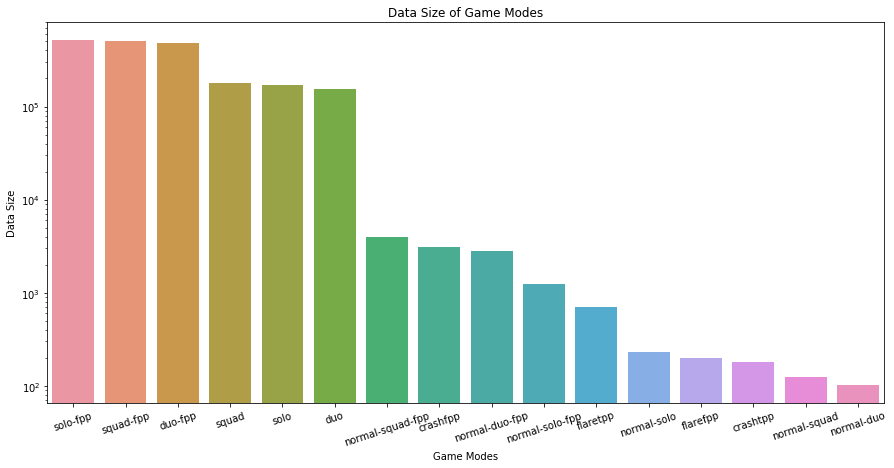

In [5]:
fig = plt.figure(figsize=(15,7))
data_plt = pd.value_counts(group_match_data['matchType'])
ind = data_plt.keys().tolist()
l_0 = data_plt
p1 = sns.barplot(ind, l_0, log=True)
plt.xticks(rotation=18)
plt.title('Data Size of Game Modes')
plt.xlabel('Game Modes')
plt.ylabel('Data Size')
# .plot(kind='bar', log=True, figsize=(15,7), xrotation=15)

In [19]:
match_group_player_count = group_match_data[['groupId', 'matchId', 'winPlacePerc']]\
.groupby(['groupId', 'matchId'])\
.count()\
.rename(index=str, columns={'winPlacePerc': 'player_count'})

In [10]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

In [11]:
transformer = MinMaxScaler().fit(grp['walkDistance'])

NameError: name 'grp' is not defined

In [13]:
data_norm = transformer.transform(grp['walkDistance'])

NameError: name 'transformer' is not defined

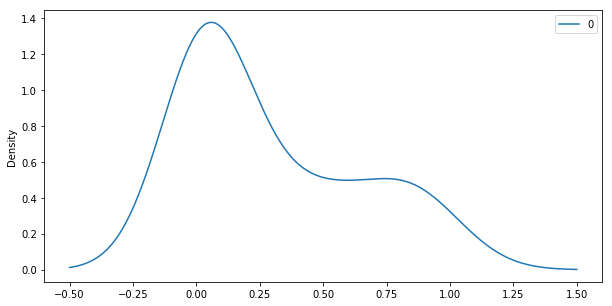

In [105]:
# grp[['walkDistance']].plot(kind='density', figsize=(20,10))
# pd.DataFrame(data_norm).plot(kind='density', figsize=(20,10))
pd.DataFrame(data_norm).plot(kind='density', figsize=(10,5))

In [16]:
df_train= df_train.set_index(['Id'])
#df_test= df_test.set_index(['Id'])
ColumnList = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals','killPoints', 
              'kills', 'killStreaks', 'longestKill','revives', 'rideDistance', 'roadKills',
              'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired', 'winPoints','winPlacePerc']
df_Train = df_train[ColumnList]
ColumnList.remove('winPlacePerc')
#df_Test = df_test[ColumnList]

In [128]:
corr = group_match_data.corr()

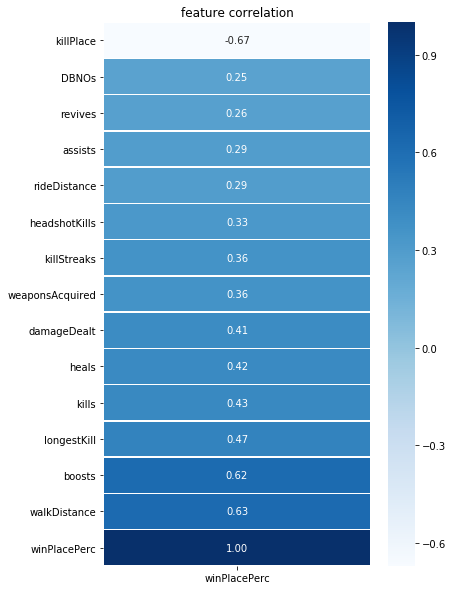

In [129]:
# corr= df_train.corr()
Y_Column = 'winPlacePerc'
corr_Target = corr[[Y_Column]]
x = 0.2
corr_T= corr_Target[abs(corr_Target['winPlacePerc'])>x]
corr_T = corr_T.sort_values(by='winPlacePerc')
fig = plt.figure(figsize=(6, 10))
# f,ax = plt.subplots()
sns.heatmap(corr_T, annot=True, linewidths=.5, fmt= '.2f', cmap=plt.cm.Blues)
plt.title("feature correlation",fontsize=12)
fig.show()
fig.savefig("corr_2_winPlace.png")

## 1.3 NEXT

In [17]:
df_train[df_train['winPlacePerc'].isnull()]

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [18]:
df_train.drop(2744604, inplace=True)

KeyError: '[2744604] not found in axis'

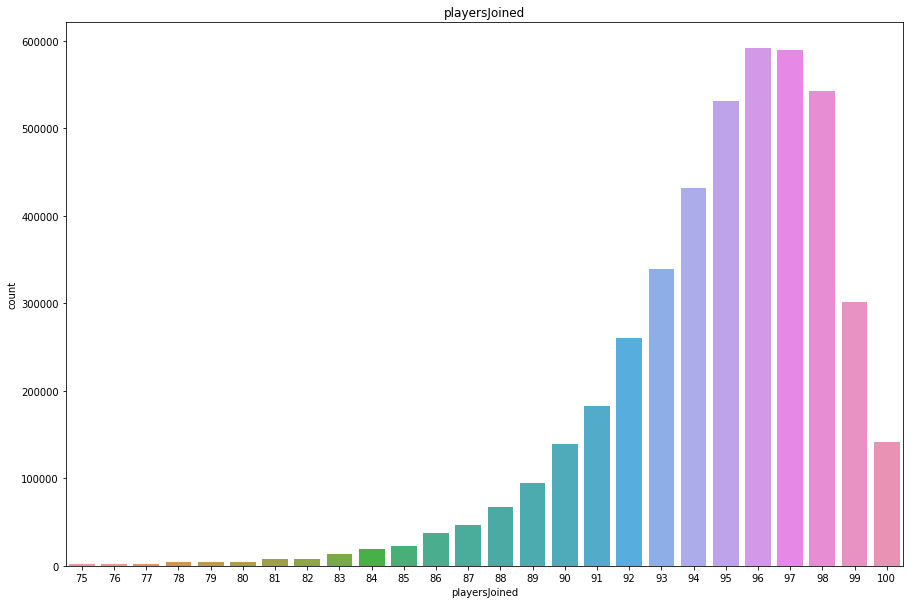

In [9]:
df_train['playersJoined'] = df_train.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
sns.countplot(df_train[df_train['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.show()

In [12]:
# Create normalized features
df_train['killsNorm'] = df_train['kills']*((100-df_train['playersJoined'])/100 + 1)
df_train['damageDealtNorm'] = df_train['damageDealt']*((100-df_train['playersJoined'])/100 + 1)
df_train['maxPlaceNorm'] = df_train['maxPlace']*((100-df_train['playersJoined'])/100 + 1)
df_train['matchDurationNorm'] = df_train['matchDuration']*((100-df_train['playersJoined'])/100 + 1)
# Compare standard features and normalized features
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
df_train[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000,0.00000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000,105.00000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270,38.38810,29,29.87,1930,1987.90


In [32]:
#We create a feature called 'healsandboosts' by adding heals and boosts.
#We are not sure if this has additional predictive value but we can always delete it 
#if the feature importance according to our random forest model is too low.

df_train['healsandboosts'] = df_train['heals'] + df_train['boosts']
df_train[['heals', 'boosts', 'healsandboosts']].tail()

,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


In [33]:
#We try to identify cheaters by checking if people are getting kills without moving. 
df_train['totalDistance'] = df_train['rideDistance'] + df_train['walkDistance'] + df_train['swimDistance']
df_train['killsWithoutMoving'] = ((df_train['kills'] > 0) & (df_train['totalDistance'] == 0))

#The feature headshot_rate will also help us to catch cheaters.
# Create headshot_rate feature
df_train['headshot_rate'] = df_train['headshotKills'] / df_train['kills']
df_train['headshot_rate'] = df_train['headshot_rate'].fillna(0)

## 1.4 Outlier Detection 

In [34]:
#This is perhaps the most obvious sign of cheating in the game. It is already fishy if a player hasn't moved during the whole game,
#but the player could be AFK and got killed. However, if the player managed to get kills it is most likely a cheater.

display(df_train[df_train['killsWithoutMoving'] == True].shape)
df_train[df_train['killsWithoutMoving'] == True].head(10)
# Remove outliers
df_train.drop(df_train[df_train['killsWithoutMoving'] == True].index, inplace=True)

(1535, 33)

In [35]:
#Anomalies in roadKills
# Players who got more than 10 roadKills
df_train[df_train['roadKills'] > 10]
df_train.drop(df_train[df_train['roadKills'] > 10].index, inplace=True)

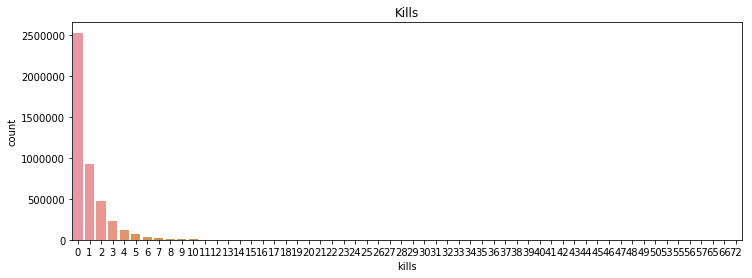

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_train, x=df_train['kills']).set_title('Kills')
plt.show()

In [ ]:
#What do you think? Should we remove all these outliers from our dataset? kill>30?

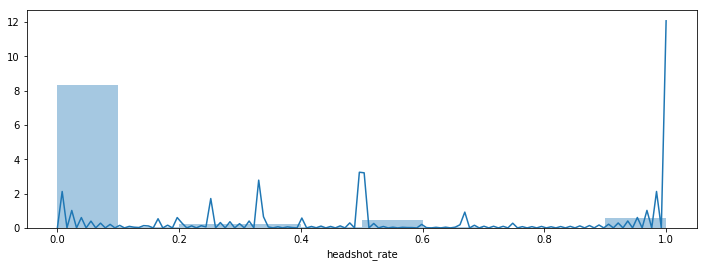

In [37]:
#However, there are a few anomalies that have a headshot_rate of 100% percent with more than 9 kills!

plt.figure(figsize=(12,4))
sns.distplot(df_train['headshot_rate'], bins=10)
plt.show()

In [41]:
# Players who made a minimum of 10 kills and have a headshot_rate of 100%
display(df_train[(df_train['headshot_rate'] == 1) & (df_train['kills'] > 9)].shape)
df_train[(df_train['headshot_rate'] == 1) & (df_train['kills'] > 9)].head(10)

(24, 33)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0,0,2939.0,5,0,0.8462,3,2939.0,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,0,0,3422.0,8,1560,1.0000,8,8142.0,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,0,0,2105.0,5,1587,1.0000,4,2105.0,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,2,0,2761.0,7,1519,0.9630,8,7948.0,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,0,0,2458.0,4,1562,1.0000,8,3476.0,False,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,0,0,2932.0,4,0,1.0000,8,8178.0,False,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,0,0,2450.0,7,1468,1.0000,5,2858.9,False,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,0,0,3915.0,5,0,1.0000,6,5963.0,False,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,0,0,3108.0,7,1500,1.0000,5,3108.0,False,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,0,0,2339.0,4,0,1.0000,12,2479.8,False,1.0


## Longest kill

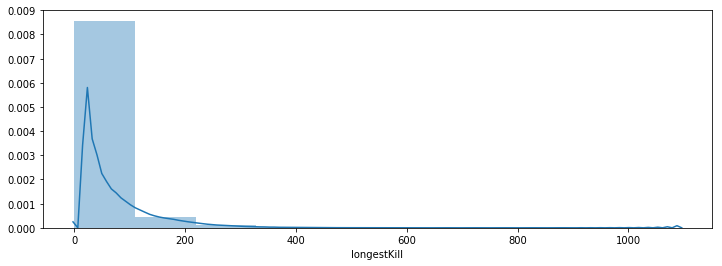

In [42]:
plt.figure(figsize=(12,4))
sns.distplot(df_train['longestKill'], bins=10)
plt.show()

In [43]:
display(df_train[df_train['longestKill'] >= 1000].shape)
df_train[df_train['longestKill'] >= 1000].head(10)

(20, 33)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0,1,3052.00,9,0,0.9231,4,3775.20,False,0.250000
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0,0,48.87,38,1500,0.5385,7,48.87,False,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,0,0,1264.00,26,0,1.0000,0,2981.00,False,0.000000
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0,0,29.21,30,1500,0.6000,0,29.21,False,0.312500
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0,0,1074.00,22,0,0.0000,0,3159.00,False,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0,0,569.50,18,0,0.9091,0,569.50,False,0.500000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0,0,832.50,9,1500,0.2857,3,832.50,False,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0,0,2848.00,4,1500,0.9412,6,2848.00,False,0.466667
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,...,0,0,235.30,41,0,0.5000,13,235.30,False,0.173913
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,...,0,0,133.20,43,0,0.6000,8,133.20,False,0.545455


In [45]:
# Remove outliers
df_train.drop(df_train[df_train['longestKill'] >= 1000].index, inplace=True)

## check distance 

In [47]:
df_train[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.445407e+06,4.445407e+06,4.445407e+06,4.445407e+06
mean,1.154616e+03,6.063224e+02,4.510883e+00,1.765450e+03
std,1.183508e+03,1.498557e+03,3.050740e+01,2.183247e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.554000e+02,0.000000e+00,0.000000e+00,1.584000e+02
50%,6.863000e+02,0.000000e+00,0.000000e+00,7.892000e+02
75%,1.977000e+03,2.593000e-01,0.000000e+00,2.729000e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


In [48]:
# walkDistance anomalies
display(df_train[df_train['walkDistance'] >= 10000].shape)
df_train[df_train['walkDistance'] >= 10000].head(10)
# Remove outliers
df_train.drop(df_train[df_train['walkDistance'] >= 10000].index, inplace=True)

(219, 33)

In [49]:
# rideDistance anomalies
display(df_train[df_train['rideDistance'] >= 20000].shape)
df_train[df_train['rideDistance'] >= 20000].head(10)
# Remove outliers
df_train.drop(df_train[df_train['rideDistance'] >= 20000].index, inplace=True)

(150, 33)

In [51]:
# swimDistance anomalies
display(df_train[df_train['swimDistance'] >= 2000].shape)
df_train[df_train['swimDistance'] >= 2000]
# Remove outliers
df_train.drop(df_train[df_train['swimDistance'] >= 2000].index, inplace=True)

(12, 33)

In [52]:
#weapons anomalies
display(df_train[df_train['weaponsAcquired'] >= 80].shape)
df_train[df_train['weaponsAcquired'] >= 80].head()
# Remove outliers
df_train.drop(df_train[df_train['weaponsAcquired'] >= 80].index, inplace=True)

(21, 33)

In [53]:
# 40 or more healing items used
display(df_train[df_train['heals'] >= 40].shape)
df_train[df_train['heals'] >= 40].head(10)
# Remove outliers
df_train.drop(df_train[df_train['heals'] >= 40].index, inplace=True)

(135, 33)

In [54]:
df_train.shape

(4444870, 33)

## one hot encode the 'matchType' feature(0) or deal with them respectively (1)?

In [ ]:
'''
# One hot encode matchType
train = pd.get_dummies(df_train, columns=['matchType'])

# Take a look at the encoding
matchType_encoding = df_train.filter(regex='matchType')
matchType_encoding.head()
'''

## 对GROUPID, MATCHID重新编码

In [ ]:
# Turn groupId and match Id into categorical types
train['groupId'] = train['groupId'].astype('category')
train['matchId'] = train['matchId'].astype('category')

# Get category coding for groupId and matchID
train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

# Get rid of old columns
train.drop(columns=['groupId', 'matchId'], inplace=True)

# Lets take a look at our newly created features
train[['groupId_cat', 'matchId_cat']].head()

In [ ]:
# because the test set contains different Id's
train.drop(columns = ['Id'], inplace=True)

## Preparation for Machine Learning 